In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [2]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [3]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
data.feature_names[4], data.feature_names[3]

('mean smoothness', 'mean area')

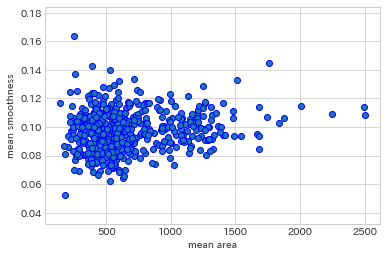

In [6]:
plt.scatter(data.data[:,3], data.data[:,4], edgecolor='b')
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

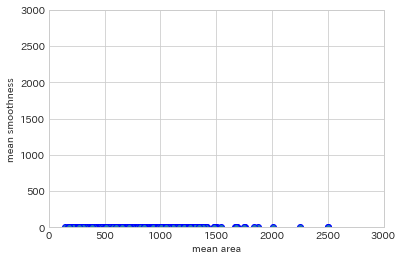

In [7]:
"""
スケール（単位、分散など）が違うのでこのままで識別すると、'mean smoothness' がいらない特徴と判断されてしまう。
"""
plt.scatter(data.data[:,3], data.data[:,4], edgecolor='b')
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

In [58]:
# data全体でやる

X = data.data
y = data.target

from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# Standardization 標準化
### 次元ごとの平均を０、分散を１にする。 相関はある。

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
scaler.fit(X_train) # fitでX_trainの次元ごとの平均,分散を見つける

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
scaler.mean_ # 次元ごとの平均

array([  1.41406967e+01,   1.92287912e+01,   9.20493407e+01,
         6.57659121e+02,   9.64813187e-02,   1.04118945e-01,
         8.79233004e-02,   4.91027648e-02,   1.81072088e-01,
         6.27191209e-02,   4.04835165e-01,   1.21421758e+00,
         2.87616703e+00,   4.06881648e+01,   7.08364615e-03,
         2.53228989e-02,   3.10979004e-02,   1.18030418e-02,
         2.05469407e-02,   3.74209692e-03,   1.62772923e+01,
         2.55917802e+01,   1.07365055e+02,   8.83720440e+02,
         1.32464901e-01,   2.54187099e-01,   2.69816338e-01,
         1.14925343e-01,   2.89765495e-01,   8.39525275e-02])

In [65]:
scaler.var_ # 分散

array([  1.29375937e+01,   1.89497421e+01,   6.14388397e+02,
         1.31566489e+05,   1.92574025e-04,   2.70784994e-03,
         5.91361980e-03,   1.51155709e-03,   7.32686012e-04,
         4.86532863e-05,   8.12231303e-02,   3.18683020e-01,
         4.41781996e+00,   2.27750332e+03,   9.48663658e-06,
         2.93895901e-04,   6.69963142e-04,   3.64697142e-05,
         6.95484910e-05,   5.16628249e-06,   2.41281993e+01,
         3.86387817e+01,   1.16867146e+03,   3.41639366e+05,
         5.16495975e-04,   2.41634259e-02,   4.13537678e-02,
         4.43143495e-03,   3.67205391e-03,   3.13682399e-04])

In [66]:
X_train_scale = scaler.transform(X_train)

In [67]:
X_train_scale.mean(axis=0), X_train_scale.std(axis=0)  # ほぼ平均０(ほぼなのは丸誤差などによる影響？)、分散１になっている。

(array([ -2.86803548e-15,  -2.99491811e-15,   2.42101821e-15,
          8.36937357e-16,   1.17024827e-15,  -1.75927649e-16,
         -1.97644099e-17,   1.25973713e-15,  -1.50160714e-15,
         -3.61713101e-15,   3.59785461e-16,   1.06874216e-15,
          9.77362269e-16,   3.12503762e-16,   9.27585237e-16,
          1.09070262e-15,   3.62225512e-16,  -5.52793464e-16,
          1.45915026e-16,   1.18049648e-15,   2.49315220e-15,
          3.56161986e-15,  -1.00932693e-15,  -1.02013559e-15,
         -1.51039132e-15,  -1.20733704e-15,   5.30955011e-16,
         -2.18628534e-16,   2.05452261e-15,  -9.05746784e-16]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.]))

In [68]:
X_train.mean(axis=0), X_train.std(axis=0)

(array([  1.41406967e+01,   1.92287912e+01,   9.20493407e+01,
          6.57659121e+02,   9.64813187e-02,   1.04118945e-01,
          8.79233004e-02,   4.91027648e-02,   1.81072088e-01,
          6.27191209e-02,   4.04835165e-01,   1.21421758e+00,
          2.87616703e+00,   4.06881648e+01,   7.08364615e-03,
          2.53228989e-02,   3.10979004e-02,   1.18030418e-02,
          2.05469407e-02,   3.74209692e-03,   1.62772923e+01,
          2.55917802e+01,   1.07365055e+02,   8.83720440e+02,
          1.32464901e-01,   2.54187099e-01,   2.69816338e-01,
          1.14925343e-01,   2.89765495e-01,   8.39525275e-02]),
 array([  3.59688667e+00,   4.35313014e+00,   2.47868594e+01,
          3.62720952e+02,   1.38771043e-02,   5.20370054e-02,
          7.69000637e-02,   3.88787485e-02,   2.70681734e-02,
          6.97519077e-03,   2.84996720e-01,   5.64520168e-01,
          2.10186107e+00,   4.77231948e+01,   3.08003841e-03,
          1.71433923e-02,   2.58836462e-02,   6.03901599e-03,
      

In [69]:
X_test_scale = scaler.transform(X_test)

In [70]:
X_test_scale.mean(axis=0), X_test_scale.std(axis=0) # テストデータで fit していないので正確にはテストデータについて平均０、分散１にはなっていない。

(array([-0.01860143,  0.06977799, -0.01617114, -0.03811687, -0.04353399,
         0.0212973 ,  0.05685811, -0.02357288,  0.01655404,  0.05616424,
         0.00590007,  0.02330493, -0.02400271, -0.03671902, -0.06914263,
         0.04519747,  0.15345978, -0.00570669, -0.00277817,  0.11596031,
        -0.00823311,  0.06860758, -0.01516127, -0.02679052, -0.02115106,
         0.00250275,  0.05822253, -0.02392703,  0.02554006, -0.00189104]),
 array([ 0.8894957 ,  0.93209279,  0.8926424 ,  0.8352226 ,  1.06062065,
         1.06795443,  1.16650413,  0.9855699 ,  1.05794147,  1.05410017,
         0.85214522,  0.87531223,  0.78655963,  0.73140607,  0.86009175,
         1.20168919,  1.66326195,  1.10007363,  0.95086108,  1.65848636,
         0.91246235,  0.93609348,  0.90690064,  0.85781315,  1.01853051,
         1.05506272,  1.11803664,  0.93075875,  1.09623816,  1.09096322]))

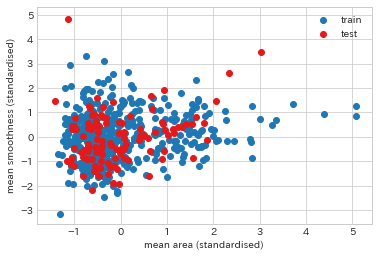

In [71]:
import matplotlib.cm as cm
plt.scatter(X_train_scale[:, 3], 
            X_train_scale[:, 4], c=cm.Paired(1), 
            label="train")
plt.scatter(X_test_scale[:, 3],  
            X_test_scale[:, 4],  c=cm.Paired(5),  
            label="test")
plt.xlabel(data.feature_names[3] + " (standardised)")
plt.ylabel(data.feature_names[4] + " (standardised)")
plt.legend(loc="best");

In [72]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [73]:
clf.fit(X_train_scale, y_train) # standardization data
print(clf.score(X_test_scale, y_test))

0.982456140351


In [74]:
clf.fit(X_train, y_train) # raw data
print(clf.score(X_test, y_test))

0.947368421053


# range scaling
### データがちょうど次元ごとにある範囲(defalut では[0, 1] )に入るように変換する。

In [75]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(-1,1)) # feature_range = [-1, 1]  [-1, 1]の範囲に入るようにする。

In [76]:
mmscaler.fit(X_train)  # fit でX_trainの次元ごとの最大最小を見つける。
X_train_mms = mmscaler.transform(X_train)
X_test_mms  = mmscaler.transform(X_test)

In [77]:
X_train_mms.max(axis=0), X_train_mms.min(axis=0) # 確かに[-1, 1]の間に入っている。

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.]))

In [78]:
X_train.max(axis=0), X_train.min(axis=0)

(array([  2.81100000e+01,   3.92800000e+01,   1.88500000e+02,
          2.50100000e+03,   1.42500000e-01,   3.45400000e-01,
          3.75400000e-01,   1.91300000e-01,   3.04000000e-01,
          9.74400000e-02,   2.87300000e+00,   4.88500000e+00,
          2.19800000e+01,   5.42200000e+02,   3.11300000e-02,
          1.35400000e-01,   3.03800000e-01,   4.09000000e-02,
          7.89500000e-02,   2.19300000e-02,   3.60400000e+01,
          4.95400000e+01,   2.51200000e+02,   4.25400000e+03,
          2.22600000e-01,   9.37900000e-01,   1.25200000e+00,
          2.90300000e-01,   6.63800000e-01,   1.73000000e-01]),
 array([  7.69100000e+00,   9.71000000e+00,   4.79200000e+01,
          1.70400000e+02,   5.26300000e-02,   1.93800000e-02,
          0.00000000e+00,   0.00000000e+00,   1.06000000e-01,
          4.99600000e-02,   1.11500000e-01,   3.60200000e-01,
          7.57000000e-01,   6.80200000e+00,   1.71300000e-03,
          2.25200000e-03,   0.00000000e+00,   0.00000000e+00,
      

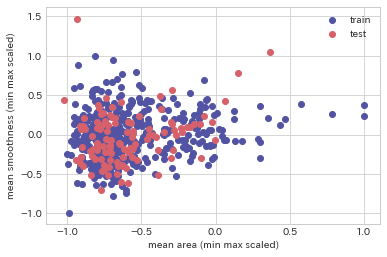

In [79]:
plt.scatter(X_train_mms[:, 3], 
            X_train_mms[:, 4], c=cm.tab20b(1), 
            label="train")
plt.scatter(X_test_mms[:, 3],  
            X_test_mms[:, 4],  c=cm.tab20b(14),  
            label="test")
plt.xlabel(data.feature_names[3] + " (min max scaled)")
plt.ylabel(data.feature_names[4] + " (min max scaled)")
plt.legend(loc="best");

In [81]:
clf.fit(X_train_mms, y_train)
print(clf.score(X_test_mms, y_test))

0.947368421053


# Normalization
### データを半径１の円(高次元ならば超球面)に投射する

In [82]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [83]:
# normalizer.fit(X_train)  fit はいらない

In [84]:
X_train_norm = normalizer.transform(X_train)  # ここのデータに対してそれぞれ異なるスケール変換をするのでいきなりtransform 
X_test_norm  = normalizer.transform(X_test)  # この変換は特徴のベクトルの方向のみが問題になる場合にのみ関係する 

In [85]:
np.linalg.norm(X_train, axis=1)[:20]

array([ 1263.02869118,   377.30786476,  2287.05049   ,   505.10471793,
         695.39646402,  1617.93437625,   364.8600456 ,   706.9938581 ,
         559.6985023 ,   606.11389748,   513.23940757,   645.73332326,
         886.83719462,   655.07246159,  1215.25048426,   853.77962249,
        1753.37544136,  1961.15652557,  1610.79663198,   878.60541766])

In [86]:
np.linalg.norm(X_train_norm, axis=1)[:20]  # ユークリッド長（ノルム）が１になるように変換された。

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [87]:
clf.fit(X_train_norm, y_train)
print(clf.score(X_test_norm, y_test))

0.789473684211


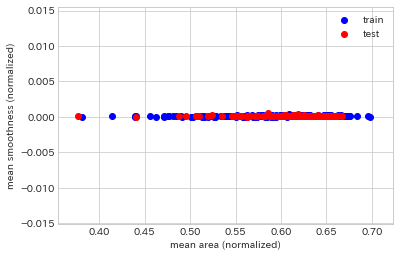

In [88]:
# スケールが揃っていない特徴量同士でやるとうまく行かない
plt.scatter(X_train_norm[:, 3], 
            X_train_norm[:, 4], c='blue', 
            label="train")
plt.scatter(X_test_norm[:, 3], 
            X_test_norm[:, 4],  c='red',  
            label="test")
plt.xlabel(data.feature_names[3] + " (normalized)")
plt.ylabel(data.feature_names[4] + " (normalized)")
plt.legend(loc="best");

#### l1ノルム, l2ノルムの詳しい説明は以下参照
http://mathtrain.jp/lpnorm

In [89]:
for norm in ['l2', 'l1', 'max']:
    normalizer = Normalizer(norm=norm)
    normalizer.fit(X_train)
    X_train_norm = normalizer.transform(X_train)
    X_test_norm  = normalizer.transform(X_test)
    clf.fit(X_train_norm, y_train)
    print(norm, clf.score(X_test_norm, y_test))

l2 0.789473684211
l1 0.666666666667
max 0.859649122807


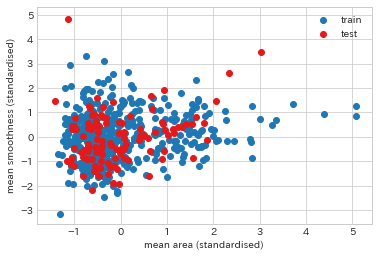

In [98]:
# スケーリングされたデータに対してはどうなのかみてみる。
# もう一度スケーリングしたデータ
plt.scatter(X_train_scale[:, 3], 
            X_train_scale[:, 4], c=cm.Paired(1), 
            label="train")
plt.scatter(X_test_scale[:, 3],  
            X_test_scale[:, 4],  c=cm.Paired(5),  
            label="test")
plt.xlabel(data.feature_names[3] + " (standardised)")
plt.ylabel(data.feature_names[4] + " (standardised)")
plt.legend(loc="best");

In [104]:
X_train_scale.mean(axis=0)
X_train_scale.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [105]:
X_train_scale_norm = normalizer.transform(X_train_scale)
X_test_scale_norm = normalizer.transform(X_test_scale)

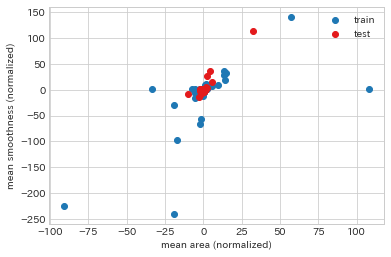

In [106]:
plt.scatter(X_train_scale_norm[:, 3], 
            X_train_scale_norm[:, 4], c=cm.Paired(1), 
            label="train")
plt.scatter(X_test_scale_norm[:, 3],  
            X_test_scale_norm[:, 4],  c=cm.Paired(5),  
            label="test")
plt.xlabel(data.feature_names[3] + " (normalized)")
plt.ylabel(data.feature_names[4] + " (normalized)")
plt.legend(loc="best");

In [111]:
np.linalg.norm(X_train_scale_norm, axis=1)[:20]  # よくわからない(笑)

array([  3.15292058,   2.6289095 ,   3.26542564,   1.5913664 ,
        18.03029048,   2.45964717,   3.2357784 ,   2.33260302,
         1.84127737,  19.91578192,   2.158971  ,   1.76031091,
         3.18498948,   6.55980725,   4.13889362,   7.78809671,
         2.32355457,   3.1223553 ,   2.90787086,   2.69783033])

# PCA Whitening

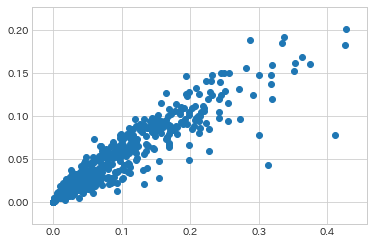

In [112]:
plt.scatter(data.data[:, 6], data.data[:, 7])

(0, 0.5)

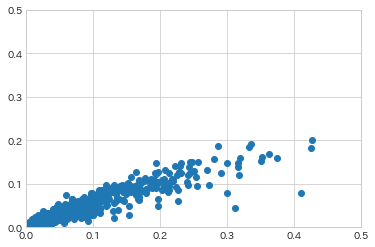

In [113]:
X = data.data[:, [6,7]]
y = data.target
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

(-0.25, 0.25)

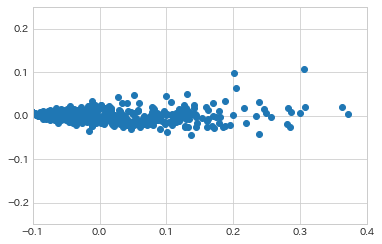

In [114]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_new = pca.transform(X) # 主成分に変換した(主軸変換)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [115]:
X_new.mean(axis=0), X_new.std(axis=0)

(array([  1.46338712e-18,   3.29262101e-18]),
 array([ 0.08751603,  0.01371268]))

(-4, 10)

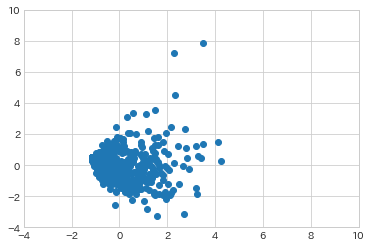

In [116]:
pca = PCA(whiten=True) #  PCAを行った後にStanderdScalerをかけるのと同じことをする　 PCAもしているので相関もゼロになる。
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-4, 10)
plt.ylim(-4, 10)

In [117]:
X_new.mean(axis=0), X_new.std(axis=0)

(array([  5.61940652e-17,   2.23215315e-16]),
 array([ 0.99912088,  0.99912088]))

In [118]:
# 本当に　"PCAを行った後にStanderdScalerをかけるのと同じことをする" ようになっているのか確認　
from sklearn.preprocessing import StandardScaler
pca = PCA()
pca.fit(X) # 共分散行列の固有値と固有ベクトルを求めている。
X_pca = pca.transform(X)
scaler = StandardScaler()
scaler.fit(X_pca) # Compute the mean and std to be used for later scaling
X_pca_whitening = scaler.transform(X_pca)

(-4, 10)

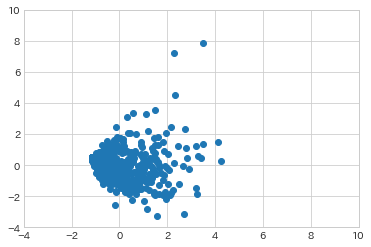

In [121]:
# plotしてみる
plt.scatter(X_pca_whitening[:, 0], X_pca_whitening[:, 1])
plt.xlim(-4, 10)
plt.ylim(-4, 10)
# 確かに同じ

# ZCA Whitening

(-3, 3)

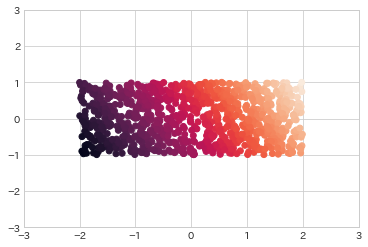

In [125]:
X = np.random.uniform(low=-1, high=1, size=(1000,2)) * (2,1) # 一様分布を作り横に伸ばした。
y =  2 * X[:,0] + X[:,1] 
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)

In [126]:
# 角度を45に決める
angle = np.pi/4

In [127]:
# 回転行列を作る。
R = np.array([[np.sin(angle), -np.cos(angle)],
              [np.cos(angle), np.sin(angle)]])
R

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

(-3, 3)

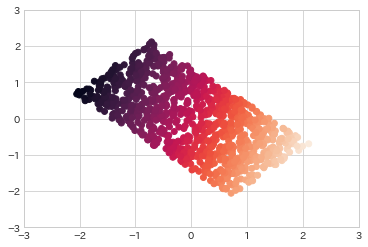

In [128]:
X_rot = X.dot(R) # 回転行列をかけて回転させる。
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)

In [129]:
X = X_rot

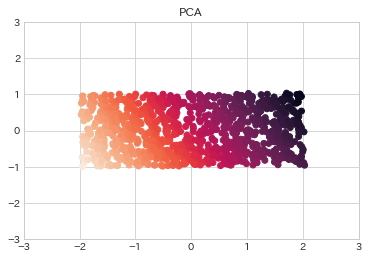

In [130]:
pca = PCA(whiten=False)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("PCA")

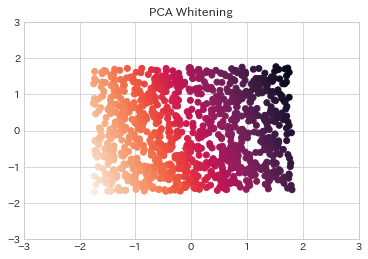

In [131]:
pca = PCA(whiten=True)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("PCA Whitening")

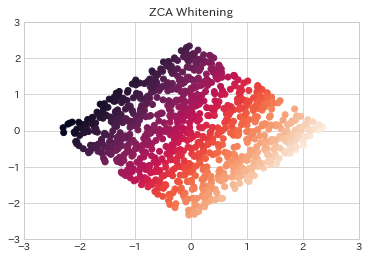

In [49]:
X_new2 = X_new.dot(pca.components_) # 主成分を横積みにして並べた行列をかけてやる。
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("ZCA Whitening")

In [133]:
pca.components_

array([[-0.70085526,  0.71330352],
       [-0.71330352, -0.70085526]])

In [134]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=5)

In [135]:
X.shape

(100, 5)

In [150]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [151]:
m = X.mean(axis=0)
Xp = (X - m) # 中心化
C = Xp.transpose().dot(Xp)/(X.shape[0] - 1) # C は　共分散行列のN(もしくはN-1)倍
w, v = np.linalg.eig(C)

In [152]:
w

array([ 92.86941616,  58.33813885,   0.91697954,   1.09878806,   1.04830982])

In [153]:
pca.explained_variance_

array([ 92.86941616,  58.33813885,   1.09878806])

In [154]:
v.T

array([[-0.13232776, -0.17923808, -0.45472851, -0.11659398,  0.85439505],
       [ 0.27783172, -0.90056886,  0.23438819,  0.23815661,  0.01135216],
       [-0.44301084, -0.02794183,  0.76933664, -0.35963795,  0.28590616],
       [ 0.8376035 ,  0.2219182 ,  0.22543663, -0.37155187,  0.24556105],
       [ 0.0863752 ,  0.32683482,  0.30916601,  0.81381634,  0.35754394]])

In [155]:
pca.components_ # 主成分方向のベクトルが横に３つ積まれている。

array([[-0.13232776, -0.17923808, -0.45472851, -0.11659398,  0.85439505],
       [-0.27783172,  0.90056886, -0.23438819, -0.23815661, -0.01135216],
       [-0.8376035 , -0.2219182 , -0.22543663,  0.37155187, -0.24556105]])